## Step-1

In [0]:
cd drive/My Drive/sysdl_asgn3 

In [0]:
import torch
import torchvision

transform = torchvision.transforms.ToTensor()
train_data=torchvision.datasets.FashionMNIST('path/to/Fashion-MNIST_root', train=True, 
                                                              transform=transform, download=True)
test_data=torchvision.datasets.FashionMNIST('path/to/Fashion-MNIST_root', train=False, 
                                                              transform=transform, download=True)

In [0]:
train_loader=torch.utils.data.DataLoader(train_data,batch_size=256,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=256,shuffle=False)

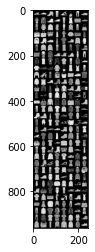

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

Model Initialization

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,16,3)
    torch.nn.init.xavier_uniform_(self.conv1.weight)
    self.conv2=nn.Conv2d(16,16,3)
    torch.nn.init.xavier_uniform_(self.conv2.weight)
    self.fc1=nn.Linear(24*24*16,100)
    torch.nn.init.xavier_uniform_(self.fc1.weight)
    self.fc2=nn.Linear(100,10)
    torch.nn.init.xavier_uniform_(self.fc2.weight)
  
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=x.view(-1,24*24*16)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc2(x)
    return x
  
model=Model()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

Training

In [0]:
train_loss=[]
train_accuracy=[]
test_loss=[]
test_accuracy=[]

In [0]:
for epoch in range(20):

    correct=0
    total=0
    running_loss=0
    for i, data in enumerate(train_loader,start=0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total+=labels.size(0)
        correct += (predicted == labels).sum().item()
    print(epoch + 1,'\nTrain Loss',round(running_loss,3))
    train_loss.append(round(running_loss))
    print('Train Accuracy',round(100 * correct / total,3),'%')
    train_accuracy.append(round(100 * correct / total, 3))

    correct = 0
    total = 0
    running_loss=0
    model.eval()
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss=criterion(outputs,labels)
            running_loss+=loss.item()
        print('Test Loss',(round(running_loss,3)))
        print('Test Accuracy',round(100 * correct / total, 3),'%')
        test_loss.append(round(running_loss,3))
        test_accuracy.append(round(100 * correct / total, 3))

print('Finished Training')

1 
Train Loss 156.658
Train Accuracy 76.132 %
Test Loss 19.603
Test Accuracy 81.69 %
2 
Train Loss 98.502
Train Accuracy 84.693 %
Test Loss 16.362
Test Accuracy 85.13 %
3 
Train Loss 85.939
Train Accuracy 86.772 %
Test Loss 16.025
Test Accuracy 85.36 %
4 
Train Loss 77.782
Train Accuracy 87.963 %
Test Loss 14.128
Test Accuracy 86.81 %
5 
Train Loss 71.904
Train Accuracy 88.9 %
Test Loss 13.467
Test Accuracy 87.54 %
6 
Train Loss 66.151
Train Accuracy 89.735 %
Test Loss 12.85
Test Accuracy 88.53 %
7 
Train Loss 62.735
Train Accuracy 90.147 %
Test Loss 12.121
Test Accuracy 89.2 %
8 
Train Loss 57.557
Train Accuracy 91.077 %
Test Loss 11.602
Test Accuracy 89.52 %
9 
Train Loss 54.77
Train Accuracy 91.448 %
Test Loss 11.376
Test Accuracy 89.64 %
10 
Train Loss 52.483
Train Accuracy 91.74 %
Test Loss 11.145
Test Accuracy 90.07 %
11 
Train Loss 49.396
Train Accuracy 92.257 %
Test Loss 11.281
Test Accuracy 89.7 %
12 
Train Loss 46.169
Train Accuracy 92.847 %
Test Loss 11.414
Test Accuracy 89.

Saving the trained model. torch.save uses python's pickle utility for serialization.

In [0]:
torch.save(model.state_dict(),'step1_model_trained.pth')

Plotting

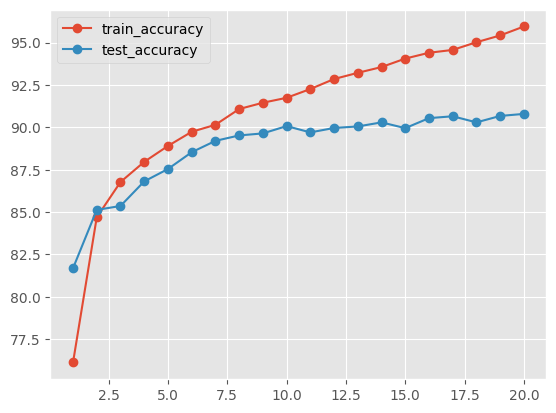

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
x=np.arange(1,21,1)
plt.plot(x,train_accuracy,'-o',label='train_accuracy')
plt.plot(x,test_accuracy,'-o', label='test_accuracy')
plt.legend()
plt.savefig('step_1_accuracy.png')
plt.show()

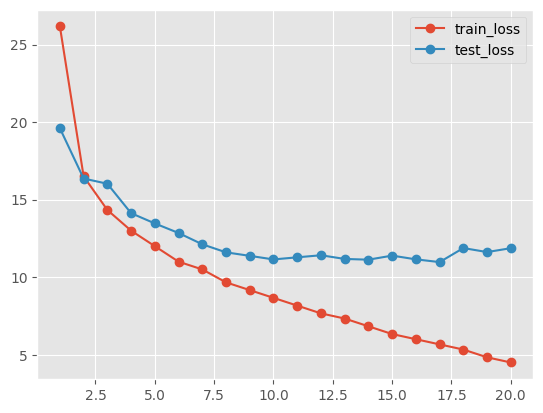

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
x=np.arange(1,21,1)
plt.plot(x,np.array(train_loss)/6,'-o',label='train_loss')
plt.plot(x,test_loss,'-o', label='test_loss')
plt.legend()
plt.savefig('step_1_loss.png')
plt.show()

Checking with loaded model

In [0]:
model.load_state_dict(torch.load('step1_model_trained.pth'))

In [0]:
correct = 0.0
total = 0.0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images:',100 * correct / total,'%')

Accuracy of the network on the 10000 test images: 90.79 %


###Facets

In [0]:
cd drive/My Drive/sysdl_asgn3 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,16,3)
    torch.nn.init.xavier_uniform_(self.conv1.weight)
    self.conv2=nn.Conv2d(16,16,3)
    torch.nn.init.xavier_uniform_(self.conv2.weight)
    self.fc1=nn.Linear(24*24*16,100)
    torch.nn.init.xavier_uniform_(self.fc1.weight)
    self.fc2=nn.Linear(100,10)
    torch.nn.init.xavier_uniform_(self.fc2.weight)
  
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=x.view(-1,24*24*16)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc2(x)
    return x
  
model=Model()

In [0]:
model.load_state_dict(torch.load('step1_model_trained.pth'))

<All keys matched successfully>

In [0]:
pred=[]
lab=[]
for i, data in enumerate(train_loader,start=0):
  inputs, labels = data
  outputs = model(inputs)
  _, predicted = torch.max(outputs.data, 1)
  lab.extend(labels.tolist())
  pred.extend(predicted.tolist())
print(len(lab),len(pred))

60000 60000


In [0]:
label_names = {
    0: 't-shirt/top',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'angle_boot'
}

In [0]:
import pandas as pd
im_ids = range(60000)

class_name = [label_names[y] for y in lab]
class_name_pred = [label_names[y] for y in pred]

# output to JSON file

df = pd.DataFrame({'id': im_ids, 'class_name': class_name, 'class_name_pred':class_name_pred })
jsonstr = df.to_json(orient='records')

with open('fmnist_data.json', 'w') as f:
    f.write(jsonstr)

In [0]:
# Display the Dive visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

#Step-2

In [0]:
!pip install mlflow

In [0]:
cd drive/My Drive/sysdl_asgn3

/content/drive/My Drive/sysdl_asgn3


In [0]:
import torch
import torchvision

transform = torchvision.transforms.ToTensor()
train_data=torchvision.datasets.FashionMNIST('path/to/Fashion-MNIST_root', train=True, 
                                                              transform=transform, download=True)
test_data=torchvision.datasets.FashionMNIST('path/to/Fashion-MNIST_root', train=False, 
                                                              transform=transform, download=True)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import mlflow
from mlflow import log_metric, log_params
torch.cuda.is_available()

False

In [0]:
class Params1(object):
  def __init__(self, filter_size1, filter_size2, channel1, channel2, fc_dim):
    self.filter_size1 = filter_size1
    self.filter_size2 = filter_size2
    self.channel1 = channel1
    self.channel2 = channel2
    self.fc_dim = fc_dim

In [0]:
class Params2(object):
  def __init__(self,initializer, batch_size, lr, momentum):
    self.initializer=initializer
    self.batch_size = batch_size
    self.lr = lr
    self.momentum = momentum

In [0]:
class Model(nn.Module):
  def __init__(self,args1,args2):
    super().__init__()
    self.conv1=nn.Conv2d(1,args1.channel1,args1.filter_size1)
    args2.initializer(self.conv1.weight)
    torch.nn.init.zeros_(self.conv1.bias)

    self.conv2=nn.Conv2d(args1.channel1,args1.channel2,args1.filter_size2)
    args2.initializer(self.conv2.weight)
    torch.nn.init.zeros_(self.conv2.bias)

    new_dim=30-args1.filter_size1-args1.filter_size2
    self.vector_reshaped_dim=new_dim*new_dim*args1.channel2

    self.fc1=nn.Linear(self.vector_reshaped_dim,args1.fc_dim)
    args2.initializer(self.fc1.weight)
    torch.nn.init.zeros_(self.fc1.bias)

    self.fc2=nn.Linear(args1.fc_dim,10)
    args2.initializer(self.fc2.weight)
    torch.nn.init.zeros_(self.fc2.bias)
  
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=x.view(-1,self.vector_reshaped_dim)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc2(x)
    return x

In [0]:
def train(epoch):
  model.train()
  correct=0
  total=0
  running_loss=0
  for i, data in enumerate(train_loader,start=0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels) 
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    _, predicted = torch.max(outputs.data, 1)
    total+=labels.size(0)
    correct += (predicted == labels).sum().item()
    accuracy=(100*correct/total)

  print('Epoch: {} \t Train Loss: {:.3f} \t Train Accuracy: {:.3f}'.format(epoch, running_loss,accuracy))

  log_metric('train_loss',running_loss,epoch)
  log_metric('train_accuracy',accuracy,epoch)

  return accuracy

In [0]:
def test(epoch):
  correct = 0
  total = 0
  running_loss=0
  model.eval()
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      loss=criterion(outputs,labels)
      running_loss+=loss.item()
      accuracy=100*correct/total
    
    print('\t\t\t Test Loss: {:.3f} \t Test Accuracy: {:.3f}'.format(running_loss,accuracy))
    log_metric('test_loss',running_loss,epoch)
    log_metric('test_accuracy',accuracy,epoch)

## 10(a)

In [0]:
mlflow.set_tracking_uri('mlruns1')
mlflow.get_tracking_uri()

'test_run'

In [0]:
args2=Params2(torch.nn.init.xavier_uniform_,256,0.01,0.9)

Different configurations of hyperparameters. We would be choosing 1 from each list.

In [0]:
conv_layer_1_filter_sizes = [3, 5]
conv_layer_2_filter_sizes = [3, 5]
conv_layer_1_channel_sizes = [8, 16, 32]
conv_layer_2_channel_sizes = [8, 16, 32]
layer_3_sizes = [100, 50]

The runtime got disconnected after 8 hours of continuos use. 70 configurations were trained during this runtime. The remaining two were trained and logged separately and is given as below.

In [0]:
#start time 12:35 end time 8:35 70 configurations done

import time
start=70
for i in range(start,72):
  x = i
  conv_layer_1_filter_size = conv_layer_1_filter_sizes[x%2]
  x = int(x/2)
  conv_layer_2_filter_size = conv_layer_2_filter_sizes[x%2]
  x = int(x/2)
  conv_layer_1_channel_size = conv_layer_1_channel_sizes[x%3]
  x = int(x/3)
  conv_layer_2_channel_size = conv_layer_2_channel_sizes[x%3]
  x = int(x/3)    
  layer_3_size = layer_3_sizes[x%2]  

  args1=Params1(conv_layer_1_filter_size,conv_layer_2_filter_size,conv_layer_1_channel_size,
                conv_layer_2_channel_size,layer_3_size)
  
  train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
  test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

  model=Model(args1,args2)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

  with mlflow.start_run():
    print('\n\n\nParams1\tID:',i)
    for key, value in vars(args1).items():
      mlflow.log_param(key, value)
      print(key,' ',value)
    print('\n')
    start=time.time()
    for epoch in range(50):
      acc=train(epoch)
      test(epoch)
      if acc>=90:
        print('(90% train accuracy reached')
        break
    end=time.time()
    mlflow.log_metric('training_time',end-start)




Params1	ID: 70
filter_size1   3
filter_size2   5
channel1   32
channel2   32
fc_dim   50


Epoch: 0 	 Train Loss: 164.603 	 Train Accuracy: 75.223
			 Test Loss: 19.315 	 Test Accuracy: 81.830
Epoch: 1 	 Train Loss: 98.896 	 Train Accuracy: 84.880
			 Test Loss: 16.537 	 Test Accuracy: 84.610
Epoch: 2 	 Train Loss: 86.437 	 Train Accuracy: 86.658
			 Test Loss: 14.880 	 Test Accuracy: 86.160
Epoch: 3 	 Train Loss: 78.921 	 Train Accuracy: 87.820
			 Test Loss: 16.297 	 Test Accuracy: 84.520
Epoch: 4 	 Train Loss: 74.142 	 Train Accuracy: 88.452
			 Test Loss: 13.861 	 Test Accuracy: 87.390
Epoch: 5 	 Train Loss: 69.084 	 Train Accuracy: 89.175
			 Test Loss: 12.929 	 Test Accuracy: 88.280
Epoch: 6 	 Train Loss: 65.467 	 Train Accuracy: 89.765
			 Test Loss: 12.374 	 Test Accuracy: 88.790
Epoch: 7 	 Train Loss: 61.971 	 Train Accuracy: 90.233
			 Test Loss: 12.389 	 Test Accuracy: 88.680
(90% train accuracy reached



Params1	ID: 71
filter_size1   5
filter_size2   5
channel1   32
cha

The whole folder was downloaded and the inference part was done locally with **mlflow ui --backend-store-uri ./mlruns1**. I will include some screenshots from mlflow UI here!

Params1(3,3,8,32,50) taken as best model and is used for Part-b.

##10(b)

In [0]:
mlflow.set_tracking_uri('mlruns2_50')
mlflow.get_tracking_uri()

'mlruns2_50'

In [0]:
args1=Params1(3,3,8,32,50)

In [0]:
initializers = [torch.nn.init.xavier_uniform_,torch.nn.init.kaiming_uniform_,torch.nn.init.orthogonal_]
batch_sizes = [1028,512,256,64]
lrs = [0.01,0.005]
momentums = [0.9,0.5]

In [0]:
#start time 2:15 end time ? 48 configurations done

import time
start=0
for i in range(start,48):
  x = i
  initializer = initializers[x%3]
  x = int(x/3)
  batch_size = batch_sizes[x%4]
  x = int(x/4)
  lr = lrs[x%2]
  x = int(x/2)
  momentum = momentums[x%2]

  args2=Params2(initializer, batch_size, lr, momentum)
  
  train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
  test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

  model=Model(args1,args2)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

  with mlflow.start_run():
    print('\n\n\nParams2\tID:',i)
    for key, value in vars(args2).items():
      mlflow.log_param(key, value)
      print(key,' ',value)
    print('\n')
    start=time.time()
    for epoch in range(50):
      acc=train(epoch)
      test(epoch)
      if acc>=90:
        print('(90% train accuracy reached')
        break
    end=time.time()
    mlflow.log_metric('training_time',end-start)




Params2	ID: 0
initializer   <function xavier_uniform_ at 0x7f79340cb268>
batch_size   1028
lr   0.01
momentum   0.9


Epoch: 0 	 Train Loss: 79.646 	 Train Accuracy: 56.512
			 Test Loss: 6.853 	 Test Accuracy: 74.960
Epoch: 1 	 Train Loss: 34.729 	 Train Accuracy: 78.495
			 Test Loss: 5.607 	 Test Accuracy: 79.470
Epoch: 2 	 Train Loss: 30.465 	 Train Accuracy: 81.158
			 Test Loss: 5.317 	 Test Accuracy: 80.780
Epoch: 3 	 Train Loss: 27.850 	 Train Accuracy: 83.072
			 Test Loss: 4.837 	 Test Accuracy: 82.380
Epoch: 4 	 Train Loss: 26.030 	 Train Accuracy: 84.328
			 Test Loss: 4.480 	 Test Accuracy: 83.940
Epoch: 5 	 Train Loss: 24.980 	 Train Accuracy: 85.218
			 Test Loss: 4.379 	 Test Accuracy: 84.210
Epoch: 6 	 Train Loss: 23.782 	 Train Accuracy: 85.553
			 Test Loss: 4.302 	 Test Accuracy: 84.460
Epoch: 7 	 Train Loss: 22.757 	 Train Accuracy: 86.372
			 Test Loss: 4.231 	 Test Accuracy: 84.590
Epoch: 8 	 Train Loss: 21.560 	 Train Accuracy: 87.138
			 Test Loss: 3.945 	 T

10-b Done

Params1(3,3,8,32,50) and Params2(orthogonal initializer, 64, 0.01,0.9) are the best parameters from the two experiments conducted. These will be used for further parts since they are giving good accuracies with less training times. 

In [0]:
#drawing plot
import pandas as pd
import matplotlib.pyplot as plt
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_xticklabels(df[xlabel],rotation='90')

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

In [0]:
df1 = pd.DataFrame({
    'models': [12, 13, 7, 3, 2, 2, 7, 2],
    'training_time': ['0-250','250-500','500-750','750-1000','1000-1250','1250-1500','1500-1750','1750-2000']})
df2 = pd.DataFrame({
    'models': [1, 1, 1, 1, 1, 1, 2, 8, 12, 14, 6],
    'test_accuracy': ['84-84.5','84.5-85','85-85.5','85.5-86','86-86.5','86.5-87','87-87.5','87.5-88','88-88.5','88.5-89','89-89.5']
})

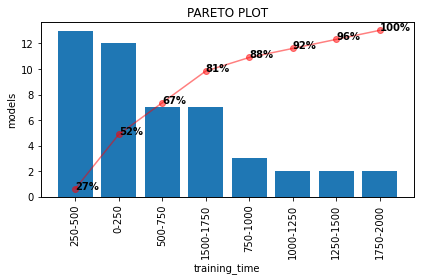

In [60]:
pareto_plot(df1, x='training_time', y='models', title='PARETO PLOT')

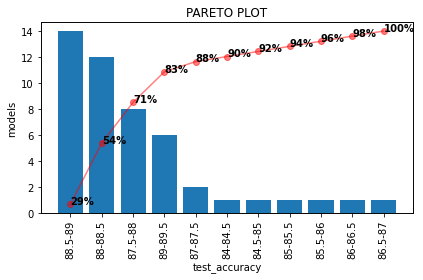

In [61]:
pareto_plot(df2, x='test_accuracy', y='models', title='PARETO PLOT')

##12(d)

For 12d separate trainings are done by changing the required hyperparameter and keeping others same as given above.

In [0]:
mlflow.set_tracking_uri('test')
mlflow.get_tracking_uri()

'test'

In [0]:
args1=Params1(3,3,8,32,50)
args2=Params2(torch.nn.init.orthogonal_, 64, 0.01,0.9)

Learning rate values tried with 0.1,0.01,0.001,0.0001

In [0]:
#args2.lr in [0.1,0.01,0.001,0.0001,0.5]
#args2.momentum in [0.99,0.999]
#args2.batch_size in [16,32,8 ]

In [0]:
for args2.batch_size in [64]:  
  train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
  test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

  import time
  model=Model(args1,args2)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

  with mlflow.start_run():
    for key, value in vars(args2).items():
      mlflow.log_param(key, value)
      print(key,' ',value)
    print('\n')
    start=time.time()
    for epoch in range(50):
      acc=train(epoch)
      test(epoch)
      if epoch>=10 and acc<=50:
        print('model not getting trained')
        break
      if acc>=90:
        print('(90% train accuracy reached')
        break
    end=time.time()
    mlflow.log_metric('training_time',end-start)

initializer   <function orthogonal_ at 0x7fa4dd142ae8>
batch_size   64
lr   0.01
momentum   0.9


Epoch: 0 	 Train Loss: 451.783 	 Train Accuracy: 82.888
			 Test Loss: 55.735 	 Test Accuracy: 87.350
Epoch: 1 	 Train Loss: 292.035 	 Train Accuracy: 88.767
			 Test Loss: 48.812 	 Test Accuracy: 88.850
Epoch: 2 	 Train Loss: 242.222 	 Train Accuracy: 90.583
			 Test Loss: 48.486 	 Test Accuracy: 88.970
(90% train accuracy reached


#Step-3

Pruning

In [0]:
!pip install mlflow

In [0]:
cd drive/My Drive/sysdl_asgn3 

/content/drive/My Drive/sysdl_asgn3


In [0]:
import torch
import torchvision

transform = torchvision.transforms.ToTensor()
train_data=torchvision.datasets.FashionMNIST('path/to/Fashion-MNIST_root', train=True, 
                                                              transform=transform, download=True)
test_data=torchvision.datasets.FashionMNIST('path/to/Fashion-MNIST_root', train=False, 
                                                              transform=transform, download=True)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import mlflow
from mlflow import log_metric, log_params
torch.cuda.is_available()

False

In [0]:
class Params1(object):
  def __init__(self, filter_size1, filter_size2, channel1, channel2, fc_dim):
    self.filter_size1 = filter_size1
    self.filter_size2 = filter_size2
    self.channel1 = channel1
    self.channel2 = channel2
    self.fc_dim = fc_dim

In [0]:
class Params2(object):
  def __init__(self,initializer, batch_size, lr, momentum):
    self.initializer=initializer
    self.batch_size = batch_size
    self.lr = lr
    self.momentum = momentum

In [0]:
class Model(nn.Module):
  def __init__(self,args1,args2):
    super().__init__()
    self.conv1=nn.Conv2d(1,args1.channel1,args1.filter_size1)
    args2.initializer(self.conv1.weight)
    torch.nn.init.zeros_(self.conv1.bias)

    self.conv2=nn.Conv2d(args1.channel1,args1.channel2,args1.filter_size2)
    args2.initializer(self.conv2.weight)
    torch.nn.init.zeros_(self.conv2.bias)

    new_dim=30-args1.filter_size1-args1.filter_size2
    self.vector_reshaped_dim=new_dim*new_dim*args1.channel2

    self.fc1=nn.Linear(self.vector_reshaped_dim,args1.fc_dim)
    args2.initializer(self.fc1.weight)
    torch.nn.init.zeros_(self.fc1.bias)

    self.fc2=nn.Linear(args1.fc_dim,10)
    args2.initializer(self.fc2.weight)
    torch.nn.init.zeros_(self.fc2.bias)
  
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=x.view(-1,self.vector_reshaped_dim)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc2(x)
    return x

Train function is modified. Changes brought out in line 13-15. Gradients of the pruned channels are made 0, so that the values of weights and bias doesn't get updated.

In [0]:
def train_prune(epoch, model, channel_list, layer_):
  model.train()
  correct=0
  total=0
  running_loss=0
  for i, data in enumerate(train_loader,start=0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels) 
    loss.backward()

    for value in channel_list:
      layer_.weight.data[value]=0
      layer_.weight.grad.data[value]=0
      layer_.bias.data[value]=0
      layer_.bias.grad.data[value]=0
    
    optimizer.step()
    running_loss += loss.item()

    _, predicted = torch.max(outputs.data, 1)
    total+=labels.size(0)
    correct += (predicted == labels).sum().item()
    accuracy=(100*correct/total)

  print('Epoch: {} \t Train Loss: {:.3f} \t Train Accuracy: {:.3f}'.format(epoch, running_loss,accuracy))

  log_metric('train_loss',running_loss,epoch)
  log_metric('train_accuracy',accuracy,epoch)

  return accuracy

In [0]:
def test(epoch, model):
  correct = 0
  total = 0
  running_loss=0
  model.eval()
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      loss=criterion(outputs,labels)
      running_loss+=loss.item()
      accuracy=100*correct/total
    
    print('\t\t\t Test Loss: {:.3f} \t Test Accuracy: {:.3f}'.format(running_loss,accuracy))
    log_metric('test_loss',running_loss,epoch)
    log_metric('test_accuracy',accuracy,epoch)

    return accuracy

In [0]:
args1=Params1(3,3,8,32,50)
args2=Params2(torch.nn.init.orthogonal_, 64, 0.01,0.9)

Do not run the below cell. Pretrained model can be called from the cell after.

In [0]:
train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

model=Model(args1,args2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

with mlflow.start_run():
  for epoch in range(50):
    acc=train(epoch, model)
    test(epoch, model)
    if epoch>=10 and acc<=50:
      print('model not getting trained')
      break
    if acc>=90:
      torch.save(model.state_dict(),'model_to_be_pruned.pth')
      print('(90% train accuracy reached')
      break

Epoch: 0 	 Train Loss: 462.756 	 Train Accuracy: 82.332
			 Test Loss: 58.907 	 Test Accuracy: 86.580
Epoch: 1 	 Train Loss: 294.859 	 Train Accuracy: 88.517
			 Test Loss: 52.466 	 Test Accuracy: 87.990
Epoch: 2 	 Train Loss: 246.627 	 Train Accuracy: 90.287
			 Test Loss: 52.191 	 Test Accuracy: 87.510
(90% train accuracy reached


Pruning is done based on l1 norm. Sum of the absolute values of weights in each channels are taken and the channel giving the smallest sum is removed until 1% pruning drop. This method is said to be more efficient than pruning random channels.

##Conv1
Total of 8 channels

In [0]:
mlflow.end_run()
mlflow.set_tracking_uri('mlruns3_pruning3')
mlflow.get_tracking_uri()

'mlruns3_pruning3'

In [0]:
#load pretrained weights
train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

model=Model(args1,args2)
model.load_state_dict(torch.load('model_to_be_pruned.pth'))

<All keys matched successfully>

Train function is modified in order to make the gradients of pruned channels 0. 

In [0]:
channel_list=[]
torch.save(model.state_dict(),'layer1_pruned_model.pth') 
#this model would be updated at the end of the run

while True:
  with mlflow.start_run():
    
    model=Model(args1,args2)
    model.load_state_dict(torch.load('layer1_pruned_model.pth'))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

    min_val=100
    channel_no=0
    with torch.no_grad():
      print('Sum of absolute weights across each channel')
      for i in range(args1.channel1):
        print(abs(model.conv1.weight.data[i]).sum())
        if abs(model.conv1.weight.data[i]).sum() < min_val and abs(model.conv1.weight.data[i]).sum()!=0:
          min_val=abs(model.conv1.weight.data[i]).sum()
          channel_no=i
      print('Pruning channel number',channel_no)
    channel_list.append(channel_no)
    mlflow.log_param('Channels_pruned',channel_list)
    mlflow.log_param('Channel','conv1')

    #test accuracy before pruning
    print('Test accuracy before pruning')
    acc_test_1=test(0,model)
    mlflow.log_metric('test_accuracy_before_pruning',acc_test_1)

    model.conv1.weight.data[channel_no]=0
    model.conv1.bias.data[channel_no]=0
    
    #test accuracy after pruning
    print('Test accuracy after pruning')
    acc_test_2=test(0,model)
    mlflow.log_metric('Test_accuracy_after_pruning',acc_test_2)

    print('Retraining for 5 epochs')
    best_model_acc=0
    for epoch in range(5):
      #new train function for removing the grads of channels before updating
      acc=train_prune(epoch,model, channel_list, model.conv1)
      acc_test_3=test(epoch,model)  #test accuracy after pruning and retraining
      if acc_test_3>best_model_acc and acc_test_1-acc_test_3<=1:
        print('Saving the model')
        best_model_acc=acc_test_3
        torch.save(model.state_dict(),'layer1_pruned_model.pth')
  
    mlflow.log_metric('test_accuracy_after_pruning_and_retraining',acc_test_3)
    print('Retraining done!!')

    pruning_drop=acc_test_1-acc_test_3
    print('Pruning drop', pruning_drop)
    mlflow.log_metric('pruning_drop',pruning_drop)
    if pruning_drop>=1:
      print('Pruning Drop exceeded 1%.\nTerminating!')
      break
    print('Done\n\n\n')

Sum of absolute weights across each channel
tensor(2.5857)
tensor(2.7781)
tensor(3.9777)
tensor(4.7581)
tensor(3.7544)
tensor(3.3142)
tensor(2.9080)
tensor(3.9024)
Pruning channel number 0
Test accuracy before pruning
			 Test Loss: 52.191 	 Test Accuracy: 87.510
Test accuracy after pruning
			 Test Loss: 61.218 	 Test Accuracy: 86.080
Retraining for 5 epochs
Epoch: 0 	 Train Loss: 218.248 	 Train Accuracy: 91.607
			 Test Loss: 44.236 	 Test Accuracy: 89.630
Saving the model
Epoch: 1 	 Train Loss: 185.485 	 Train Accuracy: 92.742
			 Test Loss: 41.903 	 Test Accuracy: 90.550
Saving the model
Epoch: 2 	 Train Loss: 158.887 	 Train Accuracy: 93.747
			 Test Loss: 42.062 	 Test Accuracy: 90.270
Epoch: 3 	 Train Loss: 135.900 	 Train Accuracy: 94.730
			 Test Loss: 45.063 	 Test Accuracy: 90.500
Epoch: 4 	 Train Loss: 115.146 	 Train Accuracy: 95.552
			 Test Loss: 46.985 	 Test Accuracy: 90.560
Saving the model
Retraining done!!
Pruning drop -3.049999999999997
Done



Sum of absolute wei

##Conv2
Total of 32 channels.

In [0]:
mlflow.end_run()
mlflow.set_tracking_uri('mlruns3_pruning4')
mlflow.get_tracking_uri()

'mlruns3_pruning4'

In [0]:
#load pretrained weights
train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

model=Model(args1,args2)
model.load_state_dict(torch.load('layer1_pruned_model.pth'))

<All keys matched successfully>

In [0]:
channel_list=[]
torch.save(model.state_dict(),'layer2_pruned_model.pth') 
#this model would be updated at the end of the run

while True:
  with mlflow.start_run():
    
    model=Model(args1,args2)
    model.load_state_dict(torch.load('layer2_pruned_model.pth'))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

    min_val=100
    channel_no=0
    with torch.no_grad():
      print('Sum of absolute weights across each channel')
      for i in range(args1.channel2):
        print(abs(model.conv2.weight.data[i]).sum())
        if abs(model.conv2.weight.data[i]).sum() < min_val and abs(model.conv2.weight.data[i]).sum()!=0:
          min_val=abs(model.conv2.weight.data[i]).sum()
          channel_no=i
      print('Pruning channel number',channel_no)
    channel_list.append(channel_no)
    mlflow.log_param('Channels_pruned',channel_list)
    mlflow.log_param('Channel','conv2')

    #test accuracy before pruning
    print('Test accuracy before pruning')
    acc_test_1=test(0,model)
    mlflow.log_metric('test_accuracy_before_pruning',acc_test_1)

    model.conv2.weight.data[channel_no]=0
    model.conv2.bias.data[channel_no]=0
    
    #test accuracy after pruning
    print('Test accuracy after pruning')
    acc_test_2=test(0,model)
    mlflow.log_metric('Test_accuracy_after_pruning',acc_test_2)

    print('Retraining for 5 epochs')
    best_model_acc=0
    for epoch in range(5):
      #new train function for removing the grads of channels before updating
      acc=train_prune(epoch,model, channel_list, model.conv2)
      acc_test_3=test(epoch,model)  #test accuracy after pruning and retraining
      if acc_test_3>best_model_acc and acc_test_1-acc_test_3<=1:
        print('Saving the model')
        best_model_acc=acc_test_3
        torch.save(model.state_dict(),'layer2_pruned_model.pth')
  
    mlflow.log_metric('test_accuracy_after_pruning_and_retraining',acc_test_3)
    print('Retraining done!!')

    pruning_drop=acc_test_1-acc_test_3
    print('Pruning drop', pruning_drop)
    mlflow.log_metric('pruning_drop',pruning_drop)
    if pruning_drop>=1:
      print('Pruning Drop exceeded 1%.\nTerminating!')
      break
    print('Done\n\n\n')

Sum of absolute weights across each channel
tensor(12.2857)
tensor(11.2218)
tensor(14.3514)
tensor(13.3373)
tensor(14.0633)
tensor(13.2985)
tensor(14.1057)
tensor(12.9477)
tensor(14.3890)
tensor(14.5998)
tensor(12.1922)
tensor(10.0325)
tensor(13.4065)
tensor(13.5310)
tensor(12.9059)
tensor(16.8178)
tensor(17.1379)
tensor(13.5464)
tensor(13.7349)
tensor(17.5403)
tensor(12.3303)
tensor(17.6684)
tensor(16.9059)
tensor(9.6459)
tensor(12.0543)
tensor(9.8157)
tensor(14.3189)
tensor(17.3772)
tensor(12.5525)
tensor(15.4237)
tensor(11.3954)
tensor(15.5083)
Pruning channel number 23
Test accuracy before pruning
			 Test Loss: 75.550 	 Test Accuracy: 89.060
Test accuracy after pruning
			 Test Loss: 75.123 	 Test Accuracy: 89.070
Retraining for 5 epochs
Epoch: 0 	 Train Loss: 45.778 	 Train Accuracy: 98.278
			 Test Loss: 84.695 	 Test Accuracy: 89.000
Saving the model
Epoch: 1 	 Train Loss: 37.932 	 Train Accuracy: 98.565
			 Test Loss: 88.473 	 Test Accuracy: 88.700
Epoch: 2 	 Train Loss: 25.85

##FC1

In [0]:
mlflow.end_run()
mlflow.set_tracking_uri('mlruns3_pruning_fc1_final')
mlflow.get_tracking_uri()

'mlruns3_pruning_fc1_final'

In [0]:
#load pretrained weights
train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

model=Model(args1,args2)
model.load_state_dict(torch.load('layer2_pruned_model.pth'))

<All keys matched successfully>

In [0]:
channel_list=[]
torch.save(model.state_dict(),'layer3_pruned_model.pth') 
#this model would be updated at the end of the run

while True:
  with mlflow.start_run():
    
    model=Model(args1,args2)
    model.load_state_dict(torch.load('layer3_pruned_model.pth'))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

    min_val=10000
    channel_no=0
    with torch.no_grad():
      print('Sum of absolute weights across each channel')
      for i in range(args1.fc_dim):
        print(abs(model.fc1.weight.data[i]).sum())
        if abs(model.fc1.weight.data[i]).sum() < min_val and abs(model.fc1.weight.data[i]).sum()!=0:
          min_val=abs(model.fc1.weight.data[i]).sum()
          channel_no=i
      print('Pruning channel number',channel_no)
    channel_list.append(channel_no)
    mlflow.log_param('Neurons_pruned',channel_list)
    mlflow.log_param('Layer','fc1')

    #test accuracy before pruning
    print('Test accuracy before pruning')
    acc_test_1=test(0,model)
    mlflow.log_metric('test_accuracy_before_pruning',acc_test_1)

    model.fc1.weight.data[channel_no]=0
    model.fc1.bias.data[channel_no]=0
    
    #test accuracy after pruning
    print('Test accuracy after pruning')
    acc_test_2=test(0,model)
    mlflow.log_metric('Test_accuracy_after_pruning',acc_test_2)

    print('Retraining for 5 epochs')
    best_model_acc=0
    for epoch in range(5):
      #new train function for removing the grads of channels before updating
      acc=train_prune(epoch,model, channel_list, model.fc1)
      acc_test_3=test(epoch,model)  #test accuracy after pruning and retraining
      if acc_test_3>best_model_acc and acc_test_1-acc_test_3<=1:
        print('Saving the model')
        best_model_acc=acc_test_3
        torch.save(model.state_dict(),'layer3_pruned_model.pth')
  
    mlflow.log_metric('test_accuracy_after_pruning_and_retraining',best_model_acc)
    print('Retraining done!!')

    pruning_drop=acc_test_1-best_model_acc
    print('Pruning drop', pruning_drop)
    mlflow.log_metric('pruning_drop',pruning_drop)
    if pruning_drop>=1:
      print('Pruning Drop exceeded 1%.\nTerminating!')
      break
    print('Done\n\n\n')

Sum of absolute weights across each channel
tensor(163.8358)
tensor(120.0145)
tensor(484.2311)
tensor(539.4022)
tensor(153.8423)
tensor(361.0255)
tensor(428.9256)
tensor(214.1773)
tensor(167.4107)
tensor(402.6514)
tensor(570.5143)
tensor(410.4556)
tensor(117.8369)
tensor(358.1692)
tensor(590.7021)
tensor(563.0073)
tensor(110.6539)
tensor(487.6255)
tensor(534.0354)
tensor(608.9399)
tensor(374.0331)
tensor(129.4575)
tensor(567.0456)
tensor(522.2075)
tensor(111.2782)
tensor(547.7162)
tensor(544.4211)
tensor(571.3960)
tensor(455.1815)
tensor(279.1576)
tensor(111.9644)
tensor(108.7892)
tensor(111.1824)
tensor(506.0455)
tensor(489.3705)
tensor(110.4797)
tensor(565.6650)
tensor(515.2955)
tensor(535.3079)
tensor(454.0270)
tensor(118.3696)
tensor(281.2218)
tensor(552.7444)
tensor(134.8579)
tensor(594.2938)
tensor(541.4160)
tensor(327.0465)
tensor(119.9058)
tensor(261.0389)
tensor(499.9288)
Pruning channel number 31
Test accuracy before pruning
			 Test Loss: 156.631 	 Test Accuracy: 89.580
Test

##FC2

In [0]:
mlflow.end_run()
mlflow.set_tracking_uri('test')
mlflow.get_tracking_uri()

'test'

In [0]:
def train_prune_fc2(epoch, model, channel_list, layer_):
  model.train()
  correct=0
  total=0
  running_loss=0
  for i, data in enumerate(train_loader,start=0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels) 
    loss.backward()

    for value in channel_list:
      layer_.weight.data[:,value]=0
      layer_.weight.grad.data[:,value]=0
    
    optimizer.step()
    running_loss += loss.item()

    _, predicted = torch.max(outputs.data, 1)
    total+=labels.size(0)
    correct += (predicted == labels).sum().item()
    accuracy=(100*correct/total)

  print('Epoch: {} \t Train Loss: {:.3f} \t Train Accuracy: {:.3f}'.format(epoch, running_loss,accuracy))

  log_metric('train_loss',running_loss,epoch)
  log_metric('train_accuracy',accuracy,epoch)

  return accuracy

In [0]:
#load pretrained weights
train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

model=Model(args1,args2)
model.load_state_dict(torch.load('layer3_pruned_model.pth'))

<All keys matched successfully>

In [0]:
pruned_neurons=[31, 35, 16, 32, 24, 30, 12, 40, 47, 1, 21, 43, 4, 0, 8, 7, 48, 29, 41, 46, 5, 13, 20, 9, 6, 11, 28, 39, 2, 34, 17, 49, 37, 33, 23, 45, 3, 25, 38, 18, 10, 36, 26, 14]

for i in pruned_neurons:
  model.fc2.weight.data[:,i]=0

In [0]:
channel_list=[]
torch.save(model.state_dict(),'layer4_pruned_model.pth') 
#this model would be updated at the end of the run

while True:
  with mlflow.start_run():
    
    model=Model(args1,args2)
    model.load_state_dict(torch.load('layer4_pruned_model.pth'))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

    min_val=10000
    channel_no=0
    with torch.no_grad():
      print('Sum of absolute weights across each channel')
      for i in range(args1.fc_dim):
        print(abs(model.fc2.weight.data[:,i]).sum())
        if abs(model.fc2.weight.data[:,i]).sum() < min_val and abs(model.fc2.weight.data[:,i]).sum()!=0:
          min_val=abs(model.fc2.weight.data[:,i]).sum()
          channel_no=i
      print('Pruning channel number',channel_no)
    channel_list.append(channel_no)
    mlflow.log_param('Neurons_pruned',channel_list)
    mlflow.log_param('Layer','fc2')

    #test accuracy before pruning
    print('Test accuracy before pruning')
    acc_test_1=test(0,model)
    mlflow.log_metric('test_accuracy_before_pruning',acc_test_1)

    model.fc2.weight.data[:,channel_no]=0
    
    #test accuracy after pruning
    print('Test accuracy after pruning')
    acc_test_2=test(0,model)
    mlflow.log_metric('Test_accuracy_after_pruning',acc_test_2)
    best_model_acc=acc_test_2
    if acc_test_1-acc_test_2<=1:
      print('Saving the model')
      torch.save(model.state_dict(),'layer4_pruned_model.pth')


    print('Retraining for 5 epochs')
    for epoch in range(5):
      #new train function for removing the grads of channels before updating
      acc=train_prune_fc2(epoch,model, channel_list, model.fc2)
      acc_test_3=test(epoch,model)  #test accuracy after pruning and retraining
      if acc_test_3>=best_model_acc and acc_test_1-acc_test_3<=1:
        print('Saving the model')
        best_model_acc=acc_test_3
        torch.save(model.state_dict(),'layer4_pruned_model.pth')
  
    mlflow.log_metric('test_accuracy_after_pruning_and_retraining',best_model_acc)
    print('Retraining done!!')

    pruning_drop=acc_test_1-best_model_acc
    print('Pruning drop %3f' %pruning_drop)
    mlflow.log_metric('pruning_drop',pruning_drop)
    if pruning_drop>=1 or best_model_acc<85:
      print('Pruning Drop exceeded 1% or accuracy less than 85% .\nTerminating!')
      break
    print('Pruning Drop exceeded 1% or accuracy less than 85% .\nTerminating!')
    print('Done\n\n\n')

Sum of absolute weights across each channel
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(7.1535)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(7.2026)
tensor(0.)
tensor(0.)
tensor(7.8060)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(6.2053)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(7.6860)
tensor(0.)
tensor(5.4140)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
Pruning channel number 44
Test accuracy before pruning
			 Test Loss: 118.974 	 Test Accuracy: 86.300
Test accuracy after pruning
			 Test Loss: 197.592 	 Test Accuracy: 70.770
Retraining for 5 epochs
Epoch: 0 	 Train Loss: 212.474 	 Train Accuracy: 92.342
			 Test Loss: 99.925 	 Test Accuracy: 84.810
Epoch: 1 	 Train Loss: 163.879 	 Train Accuracy: 94.042
			 Test Loss: 106.295 

#Step-4

In [0]:
cd drive/My Drive/sysdl_asgn3 

##FLOPS compare

In [0]:
def calculate_flops(M1,M2,F1):    
    input_shape = (1,28,28) # Format:(channels, rows,cols)
    conv_filter = [(M1,1,3,3) , (M2,M1,3,3)] # Format: (num_filters, channels, rows, cols)
    stride = 1
    padding = 0
    activation = 'relu'

    sum=0
    for i in range(2):

        #print('Input',input_shape)
        n = conv_filter[i][1] * conv_filter[i][2] * conv_filter[i][3]  # vector_length
        flops_per_instance = n + 1    # general defination for number of flops (n: multiplications and 1: additions)

        o1 = (( input_shape[1] - conv_filter[i][2] + 2*padding) / stride ) + 1  # for rows
        o2 = (( input_shape[2] - conv_filter[i][3] + 2*padding) / stride ) + 1 # multiplying with cols

        flops_per_filter = o1*o2 * flops_per_instance
        total_flops_per_layer = flops_per_filter * conv_filter[i][0]    # multiply with number of filters

        if activation == 'relu':
            total_flops_per_layer += conv_filter[i][0]*o1*o2

        input_shape=(M1,int(o1),int(o2))
        #print(total_flops_per_layer)
        sum+=total_flops_per_layer

    input_shape=(M2,int(o1),int(o2))
    #print(input_shape)
    fc1_flops=input_shape[1]*input_shape[2]*input_shape[0]*F1 + 2*F1
    #print(fc1_flops)
    sum+=fc1_flops
    fc2_flops=10*F1+10
    #print(fc2_flops)
    sum+=fc2_flops
    #print('%.3f'%(sum/1000000))

    return round(sum/1000000,3)

In [0]:
l1=[]
for i in range(8,0,-1):
  l1.append(calculate_flops(i,32,50))
for j in range(31,23,-1):
  l1.append(calculate_flops(i,j,50))
for k in range(49,5,-1):
  l1.append(calculate_flops(i,j,k))

In [0]:
acc_pareto=[87.510, 90.56,	90.95,	90.28,	90.73,	90.26	,89.71,	88.87	,88.84,	89.29,	88.68	,89.17,	89.7,	89.59,	89.57	,89.58	,89.6,	89.62	,89.64	,89.6	,89.6,	89.6,	89.59,	89.6,	89.6	,89.61,	89.57,	89.58,	89.57,	88.94,	89.41,	89.4	,89.4,	89.3,	88.91,	88.5,	89.05,	88.64,	88.92,	88.49,	88.49,	88.83,	88.75	,88.86,	88.34,	88.64,	88.64,	88.46,	87.95,	87.92,	88.17,	87.73,	87.94,	87.66,	87.53,	87.28,	86.77,	86.09,	86.15,	86.3]

In [79]:
now=2.5
count=0
tot_sum=0
l2=[]
l3=[]
for i,data in enumerate(l1):
  if data<now-0.5:
    now=now-0.25
    l2.append(count)
    l3.append(round(tot_sum/count,3))
    count=1
    tot_sum=acc_pareto[i]
  else:
    count+=1
    tot_sum+=acc_pareto[i]
if count!=0:
  l2.append(count)
  l3.append(round(tot_sum/count,3))
print(l2)
print(l3)

[2, 2, 1, 2, 4, 12, 18, 18, 1]
[89.035, 90.615, 90.73, 89.985, 88.92, 89.572, 89.166, 87.873, 86.3]


In [0]:
df_final = pd.DataFrame({
    'FLOPS (M)': ['2.25-2.5','2-2.25','1.75-2','1.|5-1.75','1.25-1.5','1-1.25','0.75-1','0.5-0.75','0.25-0.5'],
    'test_accuracy (%)': [89.035, 90.615, 90.73, 89.985, 88.92, 89.572, 89.166, 87.873, 86.3]})

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_ylim(86,91)
    ax1.set_xticklabels(df[xlabel],rotation='90')

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

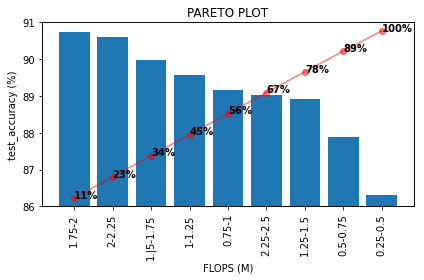

In [87]:
pareto_plot(df_final, x='FLOPS (M)', y='test_accuracy (%)', title='PARETO PLOT')

##TIME compare

In [0]:
!pip install mlflow

In [0]:
cd drive/My Drive/sysdl_asgn3 

/content/drive/My Drive/sysdl_asgn3


In [0]:
import torch
import torchvision

transform = torchvision.transforms.ToTensor()
train_data=torchvision.datasets.FashionMNIST('path/to/Fashion-MNIST_root', train=True, 
                                                              transform=transform, download=True)
test_data=torchvision.datasets.FashionMNIST('path/to/Fashion-MNIST_root', train=False, 
                                                              transform=transform, download=True)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.cuda.is_available()

True

In [0]:
class Params1(object):
  def __init__(self, filter_size1, filter_size2, channel1, channel2, fc_dim):
    self.filter_size1 = filter_size1
    self.filter_size2 = filter_size2
    self.channel1 = channel1
    self.channel2 = channel2
    self.fc_dim = fc_dim

In [0]:
class Params2(object):
  def __init__(self,initializer, batch_size, lr, momentum):
    self.initializer=initializer
    self.batch_size = batch_size
    self.lr = lr
    self.momentum = momentum

In [0]:

class Model(nn.Module):
  def __init__(self,args1,args2):
    super().__init__()
    self.conv1=nn.Conv2d(1,args1.channel1,args1.filter_size1)
    args2.initializer(self.conv1.weight)
    torch.nn.init.zeros_(self.conv1.bias)

    self.conv2=nn.Conv2d(args1.channel1,args1.channel2,args1.filter_size2)
    args2.initializer(self.conv2.weight)
    torch.nn.init.zeros_(self.conv2.bias)

    new_dim=30-args1.filter_size1-args1.filter_size2
    self.vector_reshaped_dim=new_dim*new_dim*args1.channel2

    self.fc1=nn.Linear(self.vector_reshaped_dim,args1.fc_dim)
    args2.initializer(self.fc1.weight)
    torch.nn.init.zeros_(self.fc1.bias)

    self.fc2=nn.Linear(args1.fc_dim,10)
    args2.initializer(self.fc2.weight)
    torch.nn.init.zeros_(self.fc2.bias)
  
  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.conv2(x)
    x=F.relu(x)
    x=x.view(-1,self.vector_reshaped_dim)
    x=self.fc1(x)
    x=F.relu(x)
    x=self.fc2(x)
    return x

In [0]:
def test(epoch,model,cuda_=False):
  correct = 0
  total = 0
  running_loss=0

  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      if cuda_:
        images=images.cuda()
      outputs=model(images)
      if cuda_:
        outputs=outputs.cpu()
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      loss=criterion(outputs,labels)
      running_loss+=loss.item()
      accuracy=100*correct/total
    print('\t\t\t Test Loss: {:.3f} \t Test Accuracy: {:.3f}'.format(running_loss,accuracy))

###Pruned model as GEMM

In [0]:
args1=Params1(3,3,8,32,50)
args2=Params2(torch.nn.init.orthogonal_, 64, 0.01,0.9)

In [0]:
train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

model=Model(args1,args2)
model.load_state_dict(torch.load('layer3_pruned_model.pth'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

The channels/ neurons not pruned are taken.

In [0]:
a=set(range(32))
b=(0,1,10,11,20,23,25,30)
l2=list(a.difference(b))
l3=[15,19,22,27,42,44]

In [0]:
w1=torch.as_tensor(model.conv1.weight[7].clone().detach())
w1=torch.unsqueeze(w1,0)
b1=torch.as_tensor(model.conv1.bias[7].clone().detach())
b1=torch.unsqueeze(b1,0)

w2=torch.as_tensor(model.conv2.weight[l2,7].clone().detach())
w2=torch.unsqueeze(w2,1)
b2=torch.as_tensor(model.conv2.bias[l2].clone().detach())

w3=torch.as_tensor(model.fc1.weight[l3].clone().detach())
w3=w3.view(6,32,24,24)
w3=w3[:,l2].view(6,24*24*24)
b3=torch.as_tensor(model.fc1.bias[l3].clone().detach())

w4=torch.as_tensor(model.fc2.weight[:,l3].clone().detach())
b4=torch.as_tensor(model.fc2.bias.clone().detach())
print(w1.shape,w2.shape,w3.shape,w4.shape)
print(b1.shape,b2.shape,b3.shape,b4.shape)

b2=torch.unsqueeze(b2,1)
b2=torch.unsqueeze(b2,2)      #so broadcasting of weights take place ok!

torch.Size([1, 1, 3, 3]) torch.Size([24, 1, 3, 3]) torch.Size([6, 13824]) torch.Size([10, 6])
torch.Size([1]) torch.Size([24]) torch.Size([6]) torch.Size([10])


In [0]:
import time

start=time.time()
correct = 0
total = 0
running_loss=0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    shape=images.shape

    images_unfold = torch.nn.functional.unfold(images, (3, 3))
    out_unf = images_unfold.transpose(1, 2).matmul(w1.view(w1.size(0), -1).transpose(0,1)).transpose(1, 2)
    out = out_unf.view(shape[0], 1, 26, 26)
    out.add_(b1)
    out=F.relu(out)

    out_unfold = torch.nn.functional.unfold(out, (3, 3))
    out_unf = out_unfold.transpose(1, 2).matmul(w2.view(w2.size(0), -1).transpose(0,1)).transpose(1, 2)
    out = out_unf.view(shape[0], 24, 24, 24)
   
    out.add_(b2)
    out = out.reshape(shape[0], 13824)
    out=F.relu(out)

    out_fc1=out.matmul(w3.t())
    out_fc1.add_(b3)
    out_fc1=F.relu(out_fc1)

    outputs=out_fc1.matmul(w4.t())
    outputs.add_(b4)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    loss=criterion(outputs,labels)
    running_loss+=loss.item()
    accuracy=100*correct/total
  print('\t\t\t Test Loss: {:.3f} \t Test Accuracy: {:.3f}'.format(running_loss,accuracy))
end=time.time()
print('Inference time for testloader: ',round(end-start,3))

			 Test Loss: 118.974 	 Test Accuracy: 86.300
Inference time for testloader:  2.136


In [0]:
import time
start=time.time()
images=torch.Tensor(1,1,28,28)
shape=images.shape

images_unfold = torch.nn.functional.unfold(images, (3, 3))
out_unf = images_unfold.transpose(1, 2).matmul(w1.view(w1.size(0), -1).transpose(0,1)).transpose(1, 2)
out = out_unf.view(shape[0], 1, 26, 26)
out.add_(b1)
out=F.relu(out)

out_unfold = torch.nn.functional.unfold(out, (3, 3))
out_unf = out_unfold.transpose(1, 2).matmul(w2.view(w2.size(0), -1).transpose(0,1)).transpose(1, 2)
out = out_unf.view(shape[0], 24, 24, 24)

out.add_(b2)
out = out.reshape(shape[0], 13824)
out=F.relu(out)

out_fc1=out.matmul(w3.t())
out_fc1.add_(b3)
out_fc1=F.relu(out_fc1)

outputs=out_fc1.matmul(w4.t())
outputs.add_(b4)

end=time.time()
print('Inference time one forward pass only: ',round((end-start)*1000,3),'ms')

Inference time one forward pass only:  2.163 ms


With cuda

In [0]:
import time


correct = 0
total = 0
running_loss=0
w1=w1.cuda()
b1=b1.cuda()
w2=w2.cuda()
b2=b2.cuda()
w3=w3.cuda()
b3=b3.cuda()
w4=w4.cuda()
b4=b4.cuda()

start=time.time()
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    images=images.cuda()

    shape=images.shape


    images_unfold = torch.nn.functional.unfold(images, (3, 3))
    out_unf = images_unfold.transpose(1, 2).matmul(w1.view(w1.size(0), -1).transpose(0,1)).transpose(1, 2)
    out = out_unf.view(shape[0], 1, 26, 26)
    out.add_(b1)
    out=F.relu(out)

    out_unfold = torch.nn.functional.unfold(out, (3, 3))
    out_unf = out_unfold.transpose(1, 2).matmul(w2.view(w2.size(0), -1).transpose(0,1)).transpose(1, 2)
    out = out_unf.view(shape[0], 24, 24, 24)
    out.add_(b2)
    out = out.reshape(shape[0], 13824)
    out=F.relu(out)

    out_fc1=out.matmul(w3.t())
    out_fc1.add_(b3)
    out_fc1=F.relu(out_fc1)

    outputs=out_fc1.matmul(w4.t())
    outputs.add_(b4)

    outputs=outputs.cpu()

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    loss=criterion(outputs,labels)
    running_loss+=loss.item()
    accuracy=100*correct/total
  print('\t\t\t Test Loss: {:.3f} \t Test Accuracy: {:.3f}'.format(running_loss,accuracy))
end=time.time()
print('Inference time for testloader with cuda: ',round(end-start,3))

			 Test Loss: 651.646 	 Test Accuracy: 44.870
Inference time for testloader with cuda:  0.953


###Model Step-1/ Step 3

In [0]:
#args1=Params1(3,3,16,16,100)
args1=Params1(3,3,8,32,50)
args2=Params2(torch.nn.init.orthogonal_, 64, 0.01,0.9)

In [0]:
train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

model=Model(args1,args2)
#model.load_state_dict(torch.load('step1_model_trained.pth'))
model.load_state_dict(torch.load('layer3_pruned_model.pth'))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=args2.lr, momentum=args2.momentum)

In [0]:
import time
start=time.time()
test(0,model)
end=time.time()
print('Inference time for testloader: ',round(end-start,3))

			 Test Loss: 118.974 	 Test Accuracy: 86.300
Inference time for testloader:  2.197


In [0]:
import time
arr=torch.Tensor(1,1,28,28)
start=time.time()
output=model(arr)
end=time.time()
print('Inference time one forward pass only: ',round((end-start)*1000,3),'ms')

Inference time one forward pass only:  2.439 ms


With cuda

In [0]:
model_gpu=model.cuda()
import time
start=time.time()
test(0,model_gpu,cuda_=True)
end=time.time()
print('Inference time for testloader: ',round(end-start,3))

			 Test Loss: 118.974 	 Test Accuracy: 86.300
Inference time for testloader:  0.84


###Pruned model as conv2d and fc

In [0]:
args1=Params1(3,3,8,32,50)
args2=Params2(torch.nn.init.orthogonal_, 64, 0.01,0.9)
model=Model(args1,args2)
model.load_state_dict(torch.load('layer3_pruned_model.pth'))

<All keys matched successfully>

In [0]:
args1=Params1(3,3,1,24,6)
args2=Params2(torch.nn.init.orthogonal_, 64, 0.01,0.9)

model2=Model(args1,args2)

In [0]:
w1=torch.as_tensor(model.conv1.weight[7].clone().detach())
w1=torch.unsqueeze(w1,0)
model2.conv1.weight.data=w1
b1=torch.as_tensor(model.conv1.bias[7].clone().detach())
b1=torch.unsqueeze(b1,0)
model2.conv1.bias.data=b1

w2=torch.as_tensor(model.conv2.weight[l2,7].clone().detach())
w2=torch.unsqueeze(w2,1)
model2.conv2.weight.data=w2
b2=torch.as_tensor(model.conv2.bias[l2].clone().detach())
model2.conv2.bias.data=b2

w3=torch.as_tensor(model.fc1.weight[l3].clone().detach())
w3=w3.view(6,32,24,24)
w3=w3[:,l2].view(6,24*24*24)
model2.fc1.weight.data=w3
b3=torch.as_tensor(model.fc1.bias[l3].clone().detach())
model2.fc1.bias.data=b3

w4=torch.as_tensor(model.fc2.weight[:,l3].clone().detach())
model2.fc2.weight.data=w4
b4=torch.as_tensor(model.fc2.bias.clone().detach())
model2.fc2.bias.data=b4

In [0]:
train_loader=torch.utils.data.DataLoader(train_data,batch_size=args2.batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=args2.batch_size,shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=args2.lr, momentum=args2.momentum)

In [0]:
start=time.time()
test(0,model2)
end=time.time()
print('Inference time full testloader: ',round(end-start,3),'s')

			 Test Loss: 118.974 	 Test Accuracy: 86.300
Inference time full testloader:  1.507 s


In [0]:
arr=torch.Tensor(1,1,28,28)
output=model2(arr)

With cuda

In [0]:
model2_gpu=model2.cuda()
start=time.time()
test(0,model2,cuda_=True)
end=time.time()
print('Inference time full testloader: ',round(end-start,3),'s')

			 Test Loss: 118.974 	 Test Accuracy: 86.300
Inference time full testloader:  0.78 s
